<a href="https://colab.research.google.com/github/joelsoaresjr/python_strategies/blob/main/Cruzamento_M%C3%A9dia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 13.5 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=9a61e40a3a3af7108f4f8dca98bc93fd596d6d3c3fffb74e35996a5b94f7d7ee
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import yfinance as yf
import pandas as pd 
from datetime import datetime
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings

warnings.filterwarnings('ignore')

In [3]:
def regra(ticker, start, end, curta, longa, graph_1 = True, graph_2=True, graph_3 = True, modo = 1):
  #baixar dados  
  dados = pd.DataFrame(yf.download(ticker+'.sa', start, end)["Adj Close"])
  dados.columns = [ticker]
  
  #medias moveis
  dados['{}_dias'.format(curta)] = dados.rolling(curta).mean()
  dados['{}_dias'.format(longa)] = dados.iloc[: , 0].rolling(longa).mean()

  #média - gráfico
  if graph_1 == True:
    fig = go.Figure()
    for i in dados:
      fig.add_trace(go.Scatter(x=dados.index, y=dados[i], mode='lines', name=str(i)))
    fig.update_layout(title = dados.columns[0], xaxis_title = "Data", yaxis_title = "Price")
    fig.show()
  elif graph_1 == False:
    None

  #Regra - Trade
  dados['Regra'] = np.where(dados[dados.columns[1]] > dados[dados.columns[2]], 1,-1)

  #Compras e vendas
  trade = []
  buy = [np.nan]
  sell = [np.nan] 
  for i in range(1, len(dados['Regra'])):

    trade.append(dados['Regra'][i] + dados['Regra'][i-1])
    if dados['Regra'][i] + dados['Regra'][i-1] == 0:
      
      if dados['Regra'][i-1] + dados['Regra'][i-2] == -2:


        buy.append(dados[dados.columns[0]][i])

        sell.append(np.nan)

      elif  dados['Regra'][i-1] + dados['Regra'][i-2] == 2:

        sell.append(dados[dados.columns[0]][i])

        buy.append(np.nan)

    else:
      buy.append(np.nan)
      sell.append(np.nan)

  #gráfico entradas

  if graph_2 == True:
    print('\n')
    fig = plt.figure(figsize = (30,15))
    plt.title("Entradas estratégia")
    plt.plot(dados[dados.columns[0]], color = 'black')
    plt.plot(dados[dados.columns[1]])
    plt.plot(dados[dados.columns[2]])
    plt.scatter(dados.index, buy, marker = '^', color = 'green', s = 100, label = 'Compra')
    plt.scatter(dados.index, sell, marker = 'v', color = 'red', s = 100, label = 'Venda')
    plt.legend()
    plt.show()
      
    graph_2 = False
  elif graph_2 == False:
      None 

    #Regioes compradas ou vendidas
  dados['Comprado'] = np.where((dados[dados.columns[1]]-dados[dados.columns[2]]) > 0, dados[dados.columns[0]], np.nan)
  dados['Vendido']  = np.where((dados[dados.columns[1]]-dados[dados.columns[2]]) < 0, dados[dados.columns[0]], np.nan)

  if graph_3 == True:
    print('\n')
    fig_2 = plt.figure(figsize = (30,15))

    plt.plot(dados['Vendido'], color = 'red')
    plt.plot(dados['Comprado'], color = 'green')
    plt.scatter(dados.index, buy, marker = '^', color = 'green', s = 100, label = 'Comprado')
    plt.scatter(dados.index, sell, marker = 'v', color = 'red', s = 100, label = 'Vendido')
    plt.title("Cruzamento média móvel",
                fontsize = 15);
    plt.legend(loc = 2);
    plt.show()

  elif graph_3 == False:
    pass

  #decidindo se é virando a mao ou apenas zerando
    
  if modo == 1:
    print("Regra: Virando a mão")
    flag_buy = False
    flag_sell = False

    compra = []
    venda = []

    total_1 = []
    index_1 = []



    for passo in range(len(dados)):
      if sell[passo] > 0:
        if flag_buy == False:
          print('\n')
          venda.append(dados[dados.columns[0]][passo])
          print('Você vendeu ao preço de {}'.format(dados[dados.columns[0]][passo]))
          flag_sell = True

        elif flag_buy == True:
          print('Você vendeu ao preço de {}'.format(dados[dados.columns[0]][passo]))
          print('Lucro de {}'.format(dados[dados.columns[0]][passo] - compra[0]))

          print('#################') 
          print('\n')
            
          flag_buy = False

          print('Você vendeu ao preço de {}'.format(dados[dados.columns[0]][passo]))
          venda.append(dados[dados.columns[0]][passo])
          flag_sell = True


          total_1.append(dados[dados.columns[0]][passo] - compra[0])
          index_1.append(dados[dados.columns[0]].index[passo])

          compra.pop(0)

      elif buy[passo] > 0:
        if flag_sell == False:
          compra.append(dados[dados.columns[0]][passo])
          print('\n')
          print('Você comprou ao preço de {}'.format(dados[dados.columns[0]][passo]))
          flag_buy = True

        elif flag_sell == True:
          print('Você comprou ao preço de {}'.format(dados[dados.columns[0]][passo]))
          print('Lucro de {}'.format(- dados[dados.columns[0]][passo] + venda[0]))
          print('#################')
          print('\n')

          
          flag_sell = False

          print('Você comprou ao preço de {}'.format(dados[dados.columns[0]][passo]))
          compra.append(dados[dados.columns[0]][passo])
          flag_buy = True

          total_1.append(- dados[dados.columns[0]][passo] + venda[0])
          index_1.append(dados[dados.columns[0]].index[passo])

          venda.pop(0)



    print('#################')
    print('Luro total: {}'.format(sum(total_1)))
    print('#################')

    lucro_virando = pd.DataFrame(total_1, index = index_1)

    fig_3= plt.subplots(figsize = (30,15 ))

    plt.title('Lucro acumulado - virando a mão')

    plt.plot(lucro_virando.cumsum(), color = 'blue')
    plt.scatter(lucro_virando.index, lucro_virando.cumsum(), color = 'blue')

  elif modo == 2:
    print('Zerando a mão')
    flag_buy = False
    flag_sell = False

    compra = []
    venda = []

    total =  [] 
    index = []

    for passo in range(len(dados)):
      if sell[passo] > 0:
        if flag_buy == False:
          print('\n')
          venda.append(dados[dados.columns[0]][passo])
          print('Você vendeu ao preço de {}'.format(dados[dados.columns[0]][passo]))
          flag_sell = True

        elif flag_buy == True:
          print('Você vendeu ao preço de {}'.format(dados[dados.columns[0]][passo]))
          print('Lucro de {}'.format(dados[dados.columns[0]][passo] - compra[0]))

          print('#################') 
          print('\n')
            
          flag_buy = False

            
          total.append(dados[dados.columns[0]][passo] - compra[0])
          index.append(dados[dados.columns[0]].index[passo])

          compra.pop(0)

      elif buy[passo] > 0:
        if flag_sell == False:
          compra.append(dados[dados.columns[0]][passo])
          print('\n')
          print('Você comprou ao preço de {}'.format(dados[dados.columns[0]][passo]))
          flag_buy = True

        elif flag_sell == True:
          print('Você comprou ao preço de {}'.format(dados[dados.columns[0]][passo]))
          print('Lucro de {}'.format(- dados[dados.columns[0]][passo] + venda[0]))
          print('#################')
          print('\n')

          
          flag_sell = False

          total.append(- dados[dados.columns[0]][passo] + venda[0])
          index.append(dados[dados.columns[0]].index[passo])


          venda.pop(0)



    print('#################')
    print('Luro total: {}'.format(sum(total)))
    print('#################')
      
    lucro_zerando = pd.DataFrame(total, index = index)

    fig_4= plt.subplots(figsize = (30,15 ))

    plt.title('Lucro acumulado')

    plt.plot(lucro_zerando.cumsum(), color = 'blue')
    plt.scatter(lucro_zerando.index, lucro_zerando.cumsum(), color = 'blue')


  return

[*********************100%***********************]  1 of 1 completed


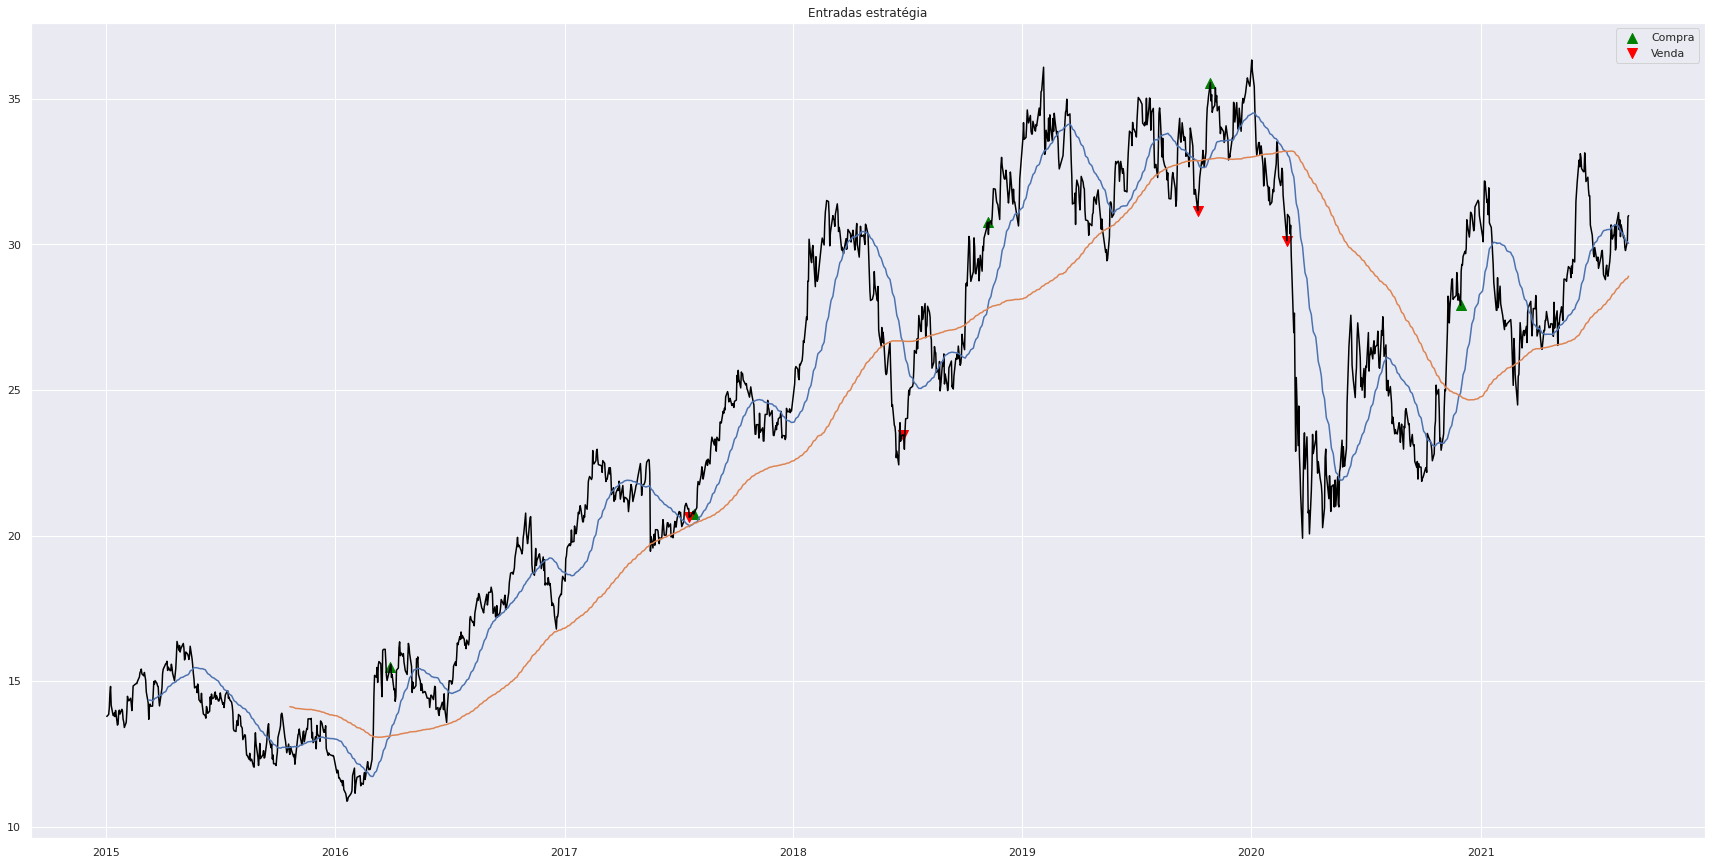

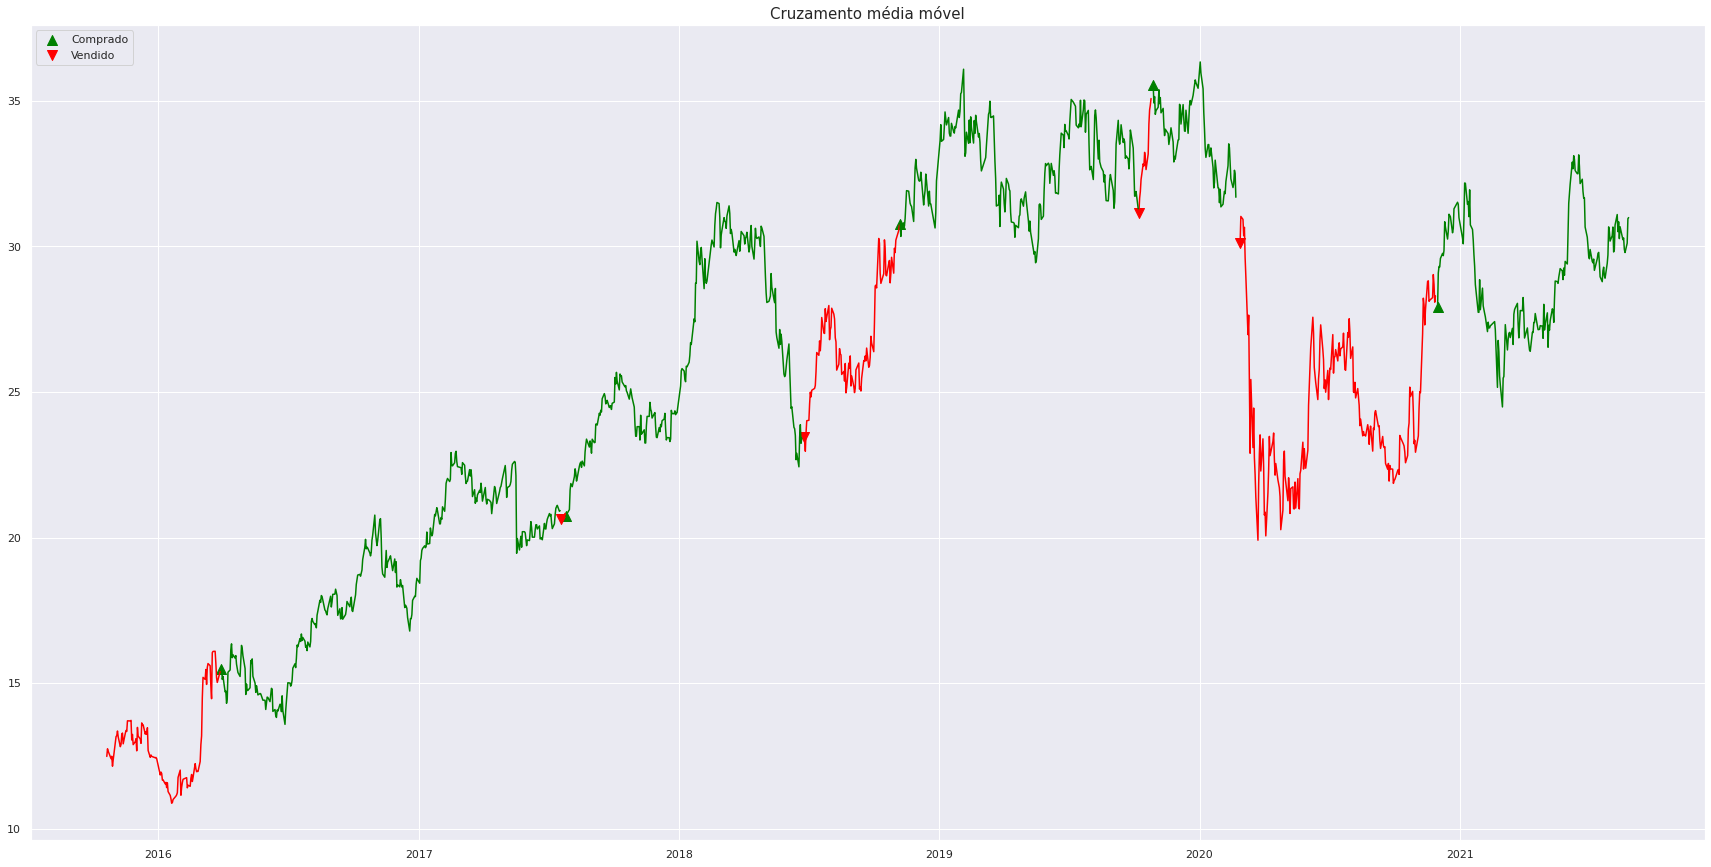

Zerando a mão


Você comprou ao preço de 15.485776901245117
Você vendeu ao preço de 20.6210994720459
Lucro de 5.135322570800781
#################




Você comprou ao preço de 20.73341178894043
Você vendeu ao preço de 23.464168548583984
Lucro de 2.7307567596435547
#################




Você comprou ao preço de 30.766016006469727
Você vendeu ao preço de 31.162078857421875
Lucro de 0.39606285095214844
#################




Você comprou ao preço de 35.55659866333008
Você vendeu ao preço de 30.12790298461914
Lucro de -5.4286956787109375
#################




Você comprou ao preço de 27.908445358276367
#################
Luro total: 2.833446502685547
#################


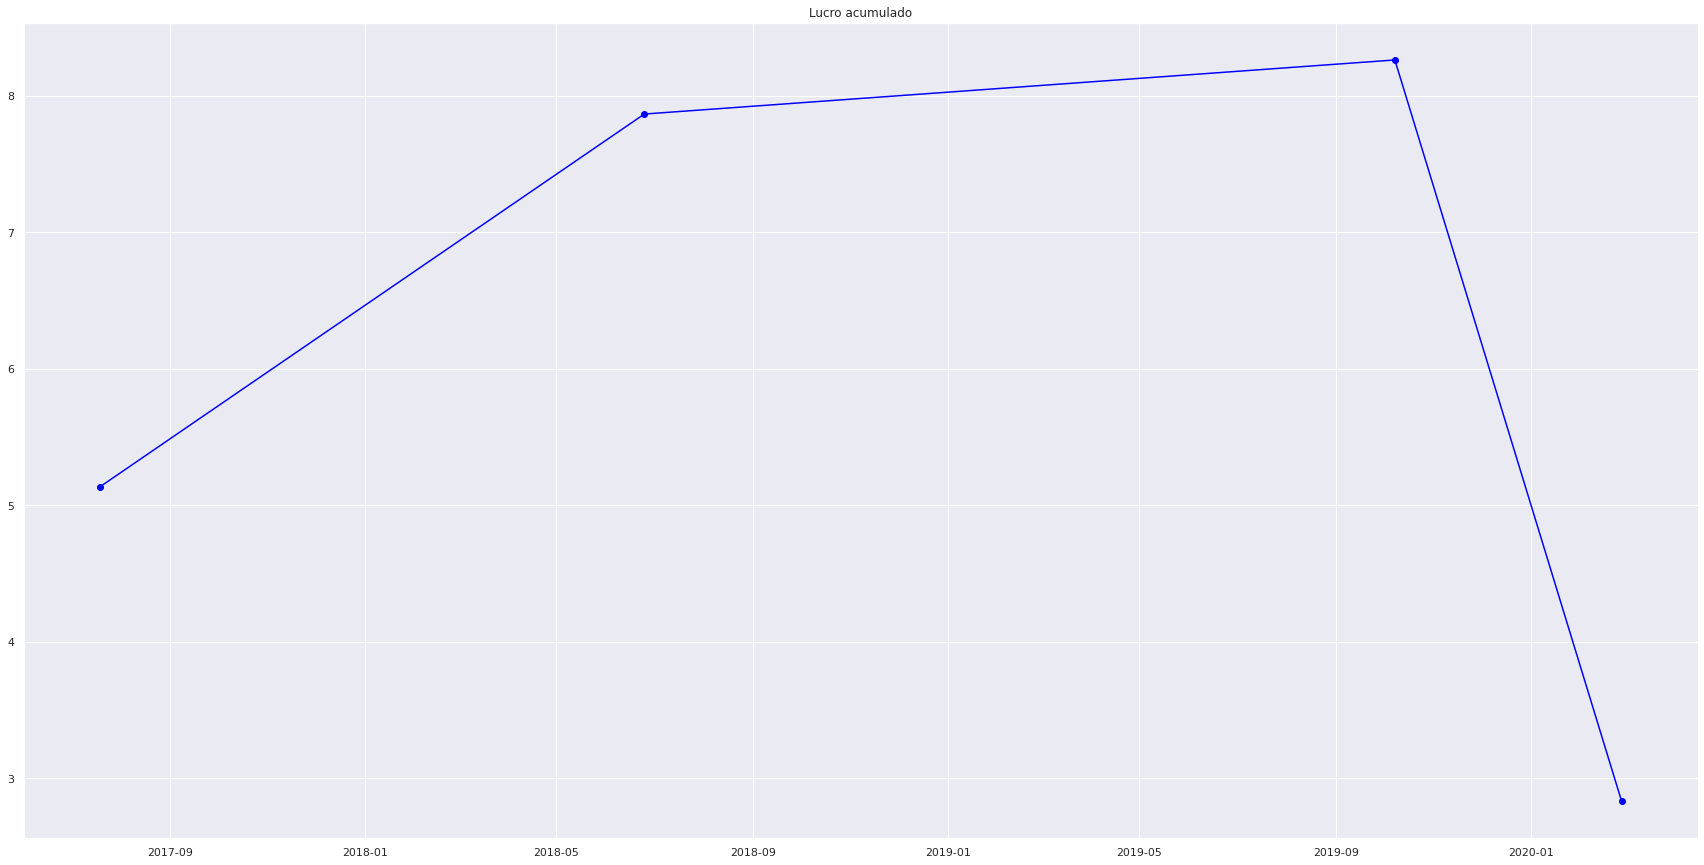

In [4]:
regra(ticker = 'ITUB4', start='2015-01-01', end = datetime.today(), curta = 45, longa = 200, graph_1 = True, graph_2 = True, graph_3 = True, modo = 2)